In [1]:
import pandas as pd
pokemon_df = pd.read_csv('data/pokemon.csv')
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [2]:
# Remove the feature without variance from this list
number_cols = ['HP', 'Attack', 'Defense']

# Leave this list as is for now
non_number_cols = ['Name', 'Type 1', 'Legendary']

# Sub-select by combining the lists with chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

   HP  Attack  Defense                   Name Type 1  Legendary
0  45      49       49              Bulbasaur  Grass      False
1  60      62       63                Ivysaur  Grass      False
2  80      82       83               Venusaur  Grass      False
3  80     100      123  VenusaurMega Venusaur  Grass      False
4  39      52       43             Charmander   Fire      False


In [3]:
# Leave this list as is
number_cols = ['HP', 'Attack', 'Defense']

# Remove the feature without variance from this list
non_number_cols = ['Name', 'Type 1']

# Create a new dataframe by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

   HP  Attack  Defense                   Name Type 1
0  45      49       49              Bulbasaur  Grass
1  60      62       63                Ivysaur  Grass
2  80      82       83               Venusaur  Grass
3  80     100      123  VenusaurMega Venusaur  Grass
4  39      52       43             Charmander   Fire


In [4]:
male = pd.read_csv('data/ANSUR_II_MALE.csv')
female = pd.read_csv('data/ANSUR_II_FEMALE.csv')
ansur_df_1 = pd.concat([male, female])
ansur_df_1.head()

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall


In [5]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Create a pairplot and color the points using the 'Gender' feature
# sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')

# # Show the plot
# plt.show()

In [6]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Remove one of the redundant features
# reduced_df = ansur_df_1.drop('stature_m', axis=1)

# # Create a pairplot and color the points using the 'Gender' feature
# sns.pairplot(reduced_df, hue='Gender')

# # Show the plot
# plt.show()

In [7]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component']

# Drop the non-numerical columns from df
df_numeric = ansur_df_1.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='Component', data=ansur_df_1)

# Show the plot
plt.show()

C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


ValueError: could not convert string to float: 'Overweight'

In [8]:
ansur_df = ansur_df_1

# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender',axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

1821 rows in test set vs. 4247 in training set. 98 Features.


In [9]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

ValueError: could not convert string to float: 'Combat Support'

In [10]:
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

93.0% accuracy on test set vs. 93.4% on training set


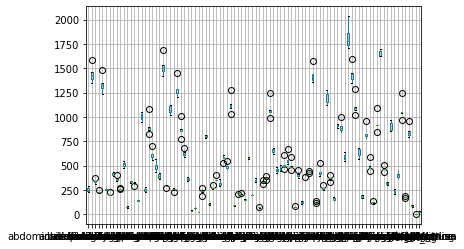

C:\Users\andre\AppData\Local\Temp/ipykernel_12704/432517654.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  normalized_df = head_df / head_df.mean()


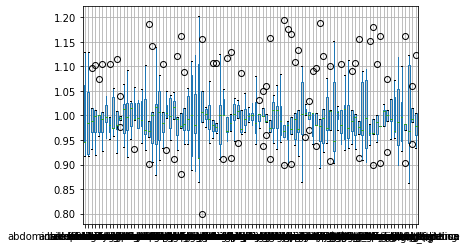

BMI                        0.008330
BMI_class                       NaN
Branch                          NaN
Component                       NaN
Gender                          NaN
                             ...   
waistfrontlengthsitting    0.004694
waistheightomphalion       0.009207
weight_kg                  0.012298
wristcircumference         0.001869
wristheight                0.005428
Length: 99, dtype: float64


C:\Users\andre\AppData\Local\Temp/ipykernel_12704/432517654.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  normalized_df = head_df / head_df.mean()


In [11]:
head_df = ansur_df.head()

# Create the boxplot
head_df.boxplot()

plt.show()

# Normalize the data
normalized_df = head_df / head_df.mean()

normalized_df.boxplot()
plt.show()

# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

In [12]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(head_df.shape[1], reduced_df.shape[1]))


Dimensionality reduced from 99 to 78.


C:\Users\andre\AppData\Local\Temp/ipykernel_12704/3884078643.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sel.fit(head_df / head_df.mean())
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_variance_threshold.py:104: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


In [13]:
# Create the correlation matrix
corr = ansur_df.corr()

# Draw the heatmap
sns.heatmap(corr, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

KeyboardInterrupt: 

In [ ]:
import numpy as np

# Create the correlation matrix
corr = ansur_df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [ ]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

In [ ]:
weird_df = pd.read_csv('data/weird.csv')

# Print the first five lines of weird_df
print(weird_df.head())

# Put nuclear energy production on the x-axis and the number of pool drownings on the y-axis
sns.scatterplot(x='nuclear_energy', y='pool_drownings', data=weird_df)
plt.show()

In [ ]:
# Print out the correlation matrix of weird_df
weird_df.corr()